# Lecture 1) Lineare & Linearisierbare Modelle - Teil 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sl
from matplotlib.pyplot import figure
%matplotlib inline
import scipy as sc
import math as ma
from scipy import linalg, optimize, constants, interpolate, special, stats
from math import exp, pow, sqrt, log

import seaborn as sns #spezielle Graphikdarstellungen
import statsmodels.api as sm
import statsmodels.stats.api as sms

## 1.1) Univariate Modelle

Als erstes laden wir einen Datensatz. 
Es bietet sich an dafür erstmal einen Benchmark-Datensatz von Sklearn zu verwenden:
    
    load_diabetes()

In [2]:
from sklearn.datasets import load_diabetes


# Load the Diabetes dataset
diabetes = load_diabetes()

# The dataset is stored as a dictionary-like object with various attributes
# You can access the data, target, feature names, and other information from the dictionary
data = diabetes.data  # Features
target = diabetes.target  # Target (diabetes progression)
feature_names = diabetes.feature_names  # Feature names

# Create a Pandas DataFrame to work with the data more easily (optional)
diabetes_df = pd.DataFrame(data, columns=feature_names)
diabetes_df['Target'] = target  # Adding the target column

# Display the first few rows of the DataFrame with the Input Features
diabetes_df


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


Der Diabetes-Datensatz ehthält die folgenden Features:

- age age in years
- sex
- bmi body mass index
- bp average blood pressure
- s1 tc, total serum cholesterol
- s2 ldl, low-density lipoproteins
- s3 hdl, high-density lipoproteins
- s4 tch, total cholesterol / HDL
- s5 ltg, possibly log of serum triglycerides level
- s6 glu, blood sugar level

Um die statistischen Eigenschaften der Größen im dataframe anzuschauen kann man

    _df.describe()
    
nutzen:

In [23]:
# Use the describe() method to get a summary of statistical characteristics
summary = diabetes_df.describe()

# Print the summary
summary

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


442 Datenpunkte, 10 Features, 1 Target

Mit Hilfe eines Pairplots lassen sich die paarweisen Zusammenhangsstrukturen analysieren

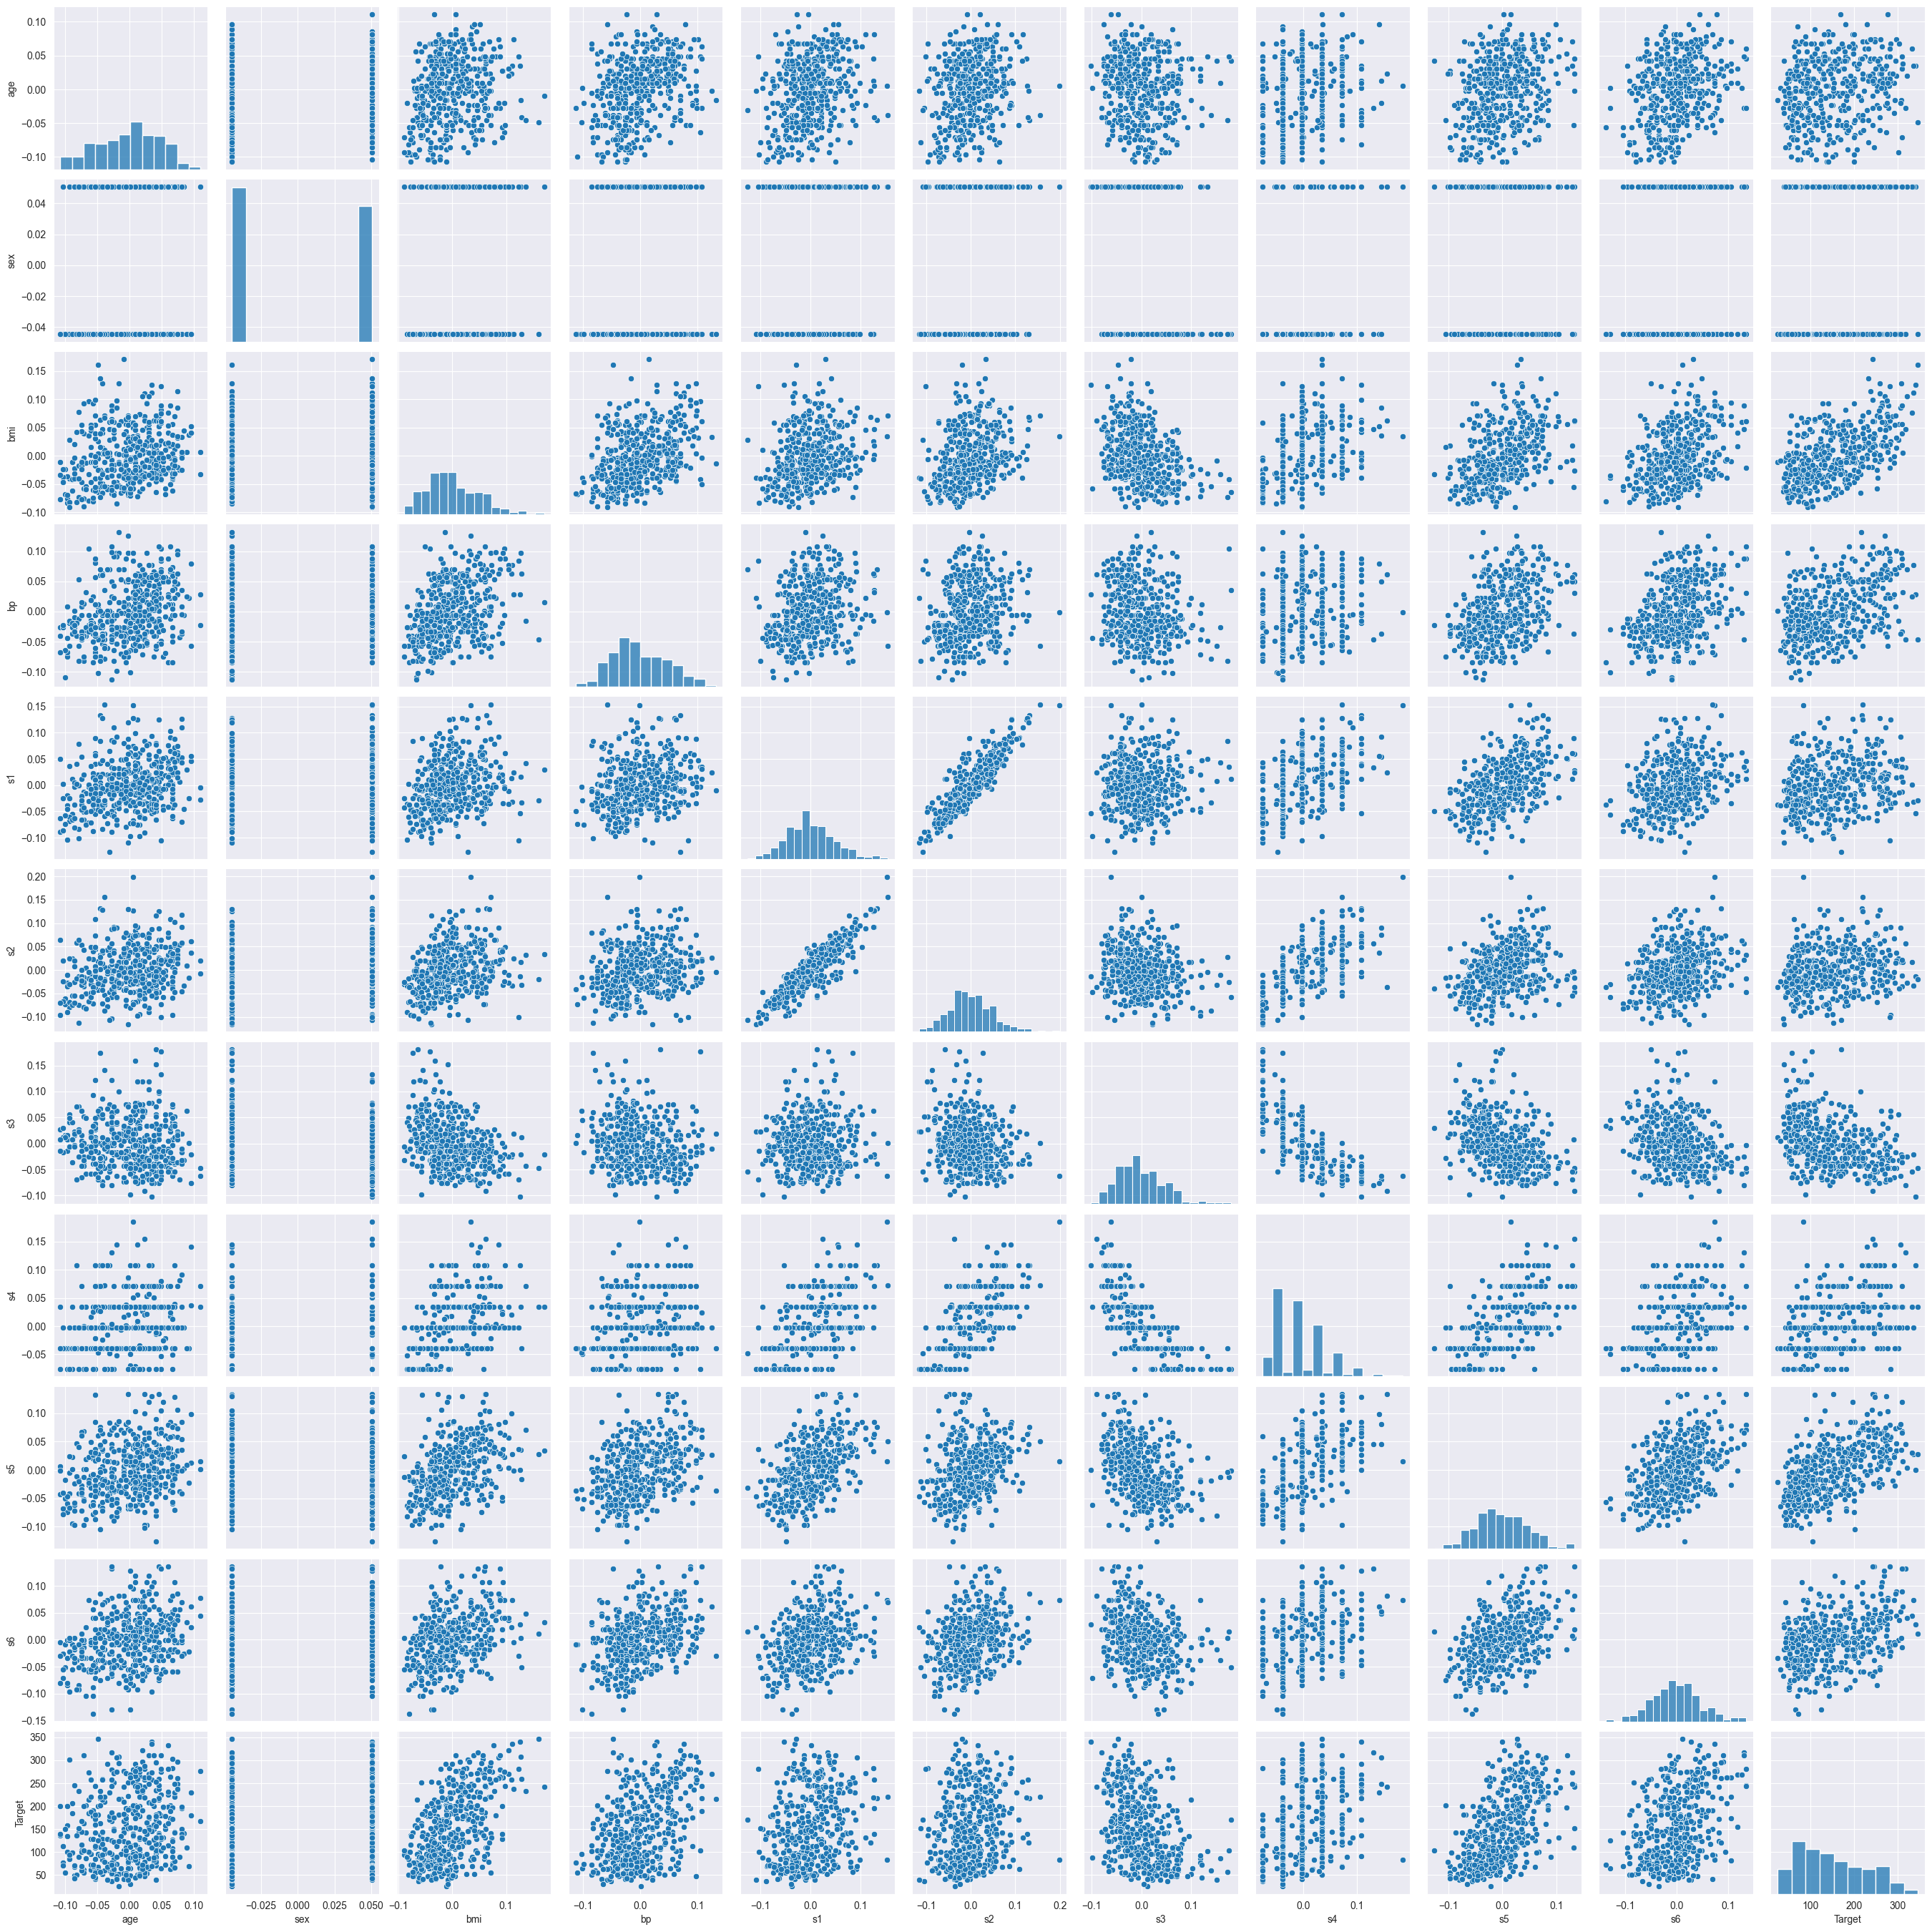

In [4]:
sns.pairplot(diabetes_df);
#plt.savefig("PairPlot.pdf", dpi=72) # saves figure to current folder!

Eine heatmap zeigt die paarweise Korrelation der Features + Zielgröße

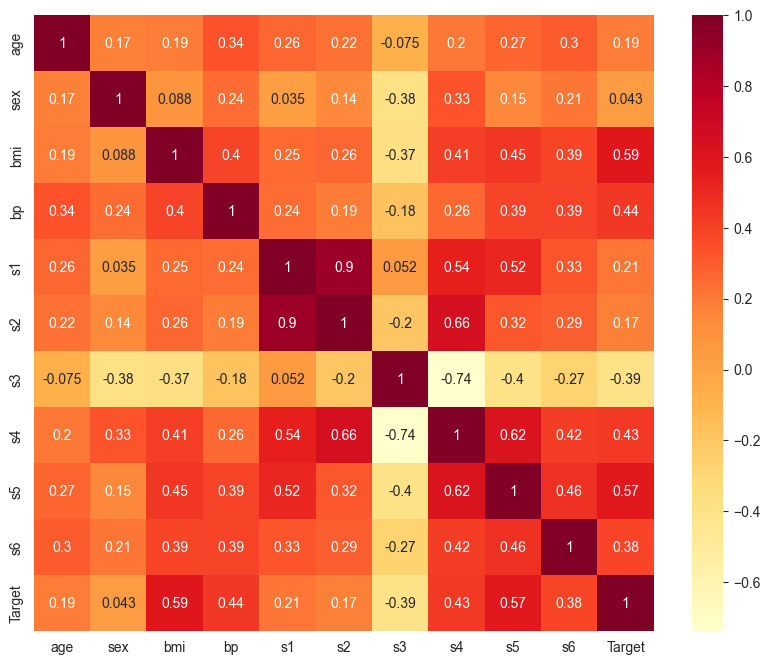

In [5]:
# Plot the correlation-Heatmap
fig = plt.figure(figsize=(10, 8));
sns.heatmap(diabetes_df.corr(), cmap="YlOrRd", annot=True)
  
plt.show()

Ganz egal, was wir hinterher für ein Modell aufsetzen um die Zielgröße zu modellieren - es gilt immer:
    
### Wir brauchen eine Aufteilung der Daten in Trainings- und Testmenge um den Modellfehler sinnvoll bewerten zu können und eine Modellauswahl treffen zu können!

Das geht mit sklearn ganz einfach mit der Funktion
    
    train_test_split(Features, Target, test_size = ...%)

In [6]:
from sklearn.model_selection import train_test_split

# Assuming you have a single DataFrame 'df' with features and target
X = diabetes_df.drop(columns=['Target'])  # Features (all columns except the target)
y = diabetes_df['Target']  # Target variable

# Split the data into training and testing sets (by default, 75% train and 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [7]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
60,-0.070900,-0.044642,-0.004050,-0.040099,-0.066239,-0.078662,0.052322,-0.076395,-0.051404,-0.034215
85,0.045341,-0.044642,0.071397,0.001215,-0.009825,-0.001001,0.015505,-0.039493,-0.041176,-0.071494
226,-0.103593,0.050680,-0.046085,-0.026328,-0.024960,-0.024800,0.030232,-0.039493,-0.039809,-0.054925
234,0.045341,-0.044642,0.039062,0.045972,0.006687,-0.024174,0.008142,-0.012556,0.064328,0.056912
26,-0.107226,-0.044642,-0.077342,-0.026328,-0.089630,-0.096198,0.026550,-0.076395,-0.042571,-0.005220


In [8]:
y_train.head()  

60      61.0
85     141.0
226     77.0
234    246.0
26     137.0
Name: Target, dtype: float64

## 1.1.1) Lineare Einfachregression

Sobald wir uns für eine erklärende Größe entschieden haben könnten wir jetzt für die ausgewählte Input-Variable die Schätzparameter im Modell

$Y=\beta_0 + \beta_1 X_1 + \epsilon$

mit Hilfe der berechneten KQ-Schätzer an die Daten anpassen.

Gesucht ist also die lineare Beziehung

$y_i=\beta_o+\beta_1 x_i+\epsilon_i$

zur Berechnung (KQ-Methode) kann man die Normalengleichungen verwenden

$\hat{b_0}=\bar{y}-\hat{b_1}\bar{x}$

und berechnet dann:

$\hat{b_1}=\frac{\sum (x_i-\bar{x})(y_i-\bar{y})}{\sum (x_i-\bar{x})^2}$.

Das kann man zur Übung mal durchrechnen.

Zunächst entscheiden wir uns für "bmi" als erklärende Größe im Modell (hatte ja die größte Korrelation mit der Zielgröße).

Das Paket statsmodels bietet die Möglichkeit lineare Modelle automatisch anpassen zu lassen. Dazu gibts OLS

OLS ist ein Paket, mit dem man für unterschiedliche Modelltypen eine KQ (Least Squares) Schätzung berechnen kann

#### ACHTUNG: Die Funktion OLS erwartet an der ersten Stelle das y und an den folgenden Stellen x (bzw. x1, x2, ...)
#### Möchte man einen konstanten Term ($\beta_0$) mit im Modell haben muß man der Datenmatrix vorne noch die 1er-Spalte anhängen

Wir verwenden im Folgenden das OLS-Modell, weil es flexibler ist.
Zunächst bereiten wir die Daten für das Modell vor.

In [9]:
# erklärende Größe - Training, Test
X_train_bmi_1 = X_train['bmi']
X_test_bmi_1 = X_test['bmi']


In [10]:
# 1er Spalte an die Datenmatrix anhängen

X_train_bmi = sm.add_constant(X_train_bmi_1) # 1er Spalte vorne anhängen
X_test_bmi = sm.add_constant(X_test_bmi_1) # 1er Spalte vorne anhängen

X_train_bmi.head()

,const,bmi
60,1.0,-0.004050
85,1.0,0.071397
226,1.0,-0.046085
234,1.0,0.039062
26,1.0,-0.077342


Jetzt können wir das Modell an die Trainingsdaten anpassen lassen

In [11]:
# Model Fit - Train

olsmod_LinReg = sm.OLS(y_train, X_train_bmi) # definition of model
olsres_LinReg = olsmod_LinReg.fit() # parameter estimation on Train set - model name olsres_LinReg
print(olsres_LinReg.summary()) # Summary 

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     153.7
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           3.17e-29
Time:                        10:15:23   Log-Likelihood:                -1833.6
No. Observations:                 331   AIC:                             3671.
Df Residuals:                     329   BIC:                             3679.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.0546      3.397     44.466      0.0

Mit der Funktion

    model_predict(x_data)
    
lassen sich bequem Prognosen erzeugen

In [107]:
y_hat_LinReg_tr = olsres_LinReg.predict(X_train_bmi) # predictions on training set
y_hat_LinReg_te = olsres_LinReg.predict(X_test_bmi) # predictions on test set

y_hat_LinReg_tr.head()

60     147.477825
85     214.103157
226    110.357997
234    185.549443
26      82.756073
dtype: float64

Plot der Daten auf der Trainingsmenge

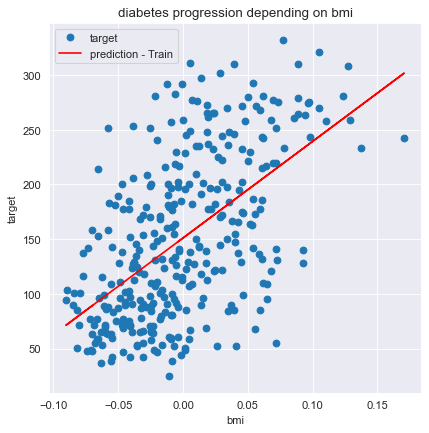

In [13]:
# Plot size
plt.figure(figsize=(6, 6), dpi=80)

plt.plot(X_train_bmi['bmi'], y_train, 'o', label='target');
plt.plot(X_train_bmi['bmi'],y_hat_LinReg_tr, 'r', label='prediction - Train');

plt.xlabel('bmi')
plt.ylabel('target') 
plt.title('diabetes progression depending on bmi')

#position of labels
plt.legend(); 


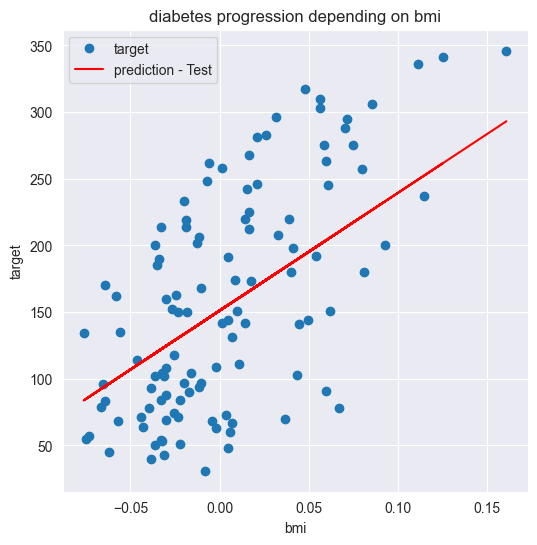

In [14]:
# Plot size
plt.figure(figsize=(6, 6), dpi=100)

plt.plot(X_test_bmi['bmi'], y_test, 'o', label='target')
plt.plot(X_test_bmi['bmi'],y_hat_LinReg_te, 'r', label='prediction - Test')

plt.xlabel('bmi')
plt.ylabel('target') 
plt.title('diabetes progression depending on bmi')

#position of labels
plt.legend(loc='upper left'); 

Das Modell sieht nicht ganz sinnlos aus. Aber richtig gut ist es natürlich nicht.
Eine graphische Darstellung der Residuen ist hilfreich um hinterher auch vergleichen zu können...

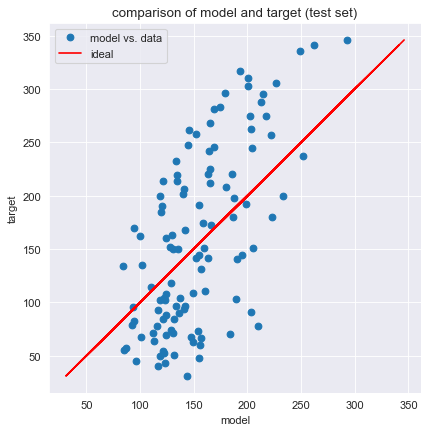

In [15]:
# Plot size
plt.figure(figsize=(6, 6), dpi=80)

plt.plot(y_hat_LinReg_te, y_test, 'o', label='model vs. data')
plt.plot(y_test,y_test, 'r', label='ideal')

plt.xlabel('model')
plt.ylabel('target') 
plt.title('comparison of model and target (test set)')

#position of labels
plt.legend(); 


ein Histogramm zeigt die Verteilung der Residuen

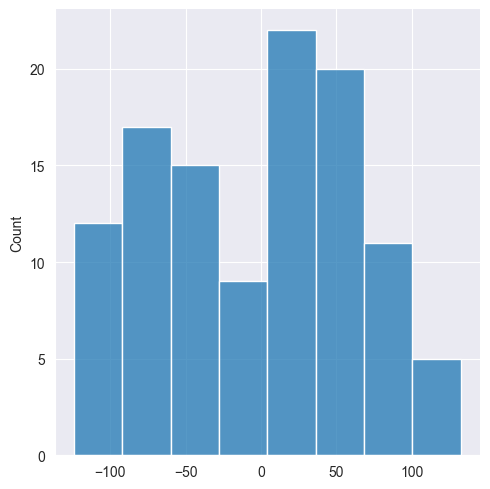

In [16]:
sns.displot(y_hat_LinReg_te- y_test); #Histogram of residuals

...die Struktur der Verteilung sieht gut aus 

- peak ungefähr in der 0
- einigermaßen symmetrisch

aber die Streuung ist deutlich zu groß (-150 - +100)

#### Bewertung der Prognose mit Hilfe (einfacher) quantitativer Maße

Um zu sagen wie gut die Prognose ist braucht man Fehlermaße

- Root Mean Square error (RMSE):    
Man kann sich entweder selbst eine Funktion definieren, die den RMSE $\sqrt{\frac{1}{n}\sum_{i=1}^{n}(out_i - tar_i)^2}$ auswertet, oder eingebaute Funktionalitäten benutzen.

- bias des Modelles:  
man berechnet als Schätzung für den Bias die Differenz der Mittelwerte von Output und Target:
$bias= MW(out) - MW(tar)$

- Korrelation zwischen Output und Target:  
$\rho=corr(out,tar)=\sqrt{R^2}$


Wir analysieren zuerst einmal das Modellergebnis auf der Trainings- und Testmenge.
Am besten definiert man sich später dazu geeignete Funktionen

In [17]:
# RMSE

from sklearn.metrics import mean_squared_error 
from math import sqrt

rmseLMTr = sqrt(mean_squared_error(y_train,y_hat_LinReg_tr)) 
rmseLMTe = sqrt(mean_squared_error(y_test,y_hat_LinReg_te)) 
print('Train',rmseLMTr)
print('Test',rmseLMTe)

Train 61.60215228840095
Test 64.96101945454518


In [18]:
# bias

biasLMTr=np.mean(y_hat_LinReg_tr)-np.mean(y_train)
biasLMTe=np.mean(y_hat_LinReg_te)-np.mean(y_test)
print('Train',biasLMTr)
print('Test',biasLMTe)

Train -2.842170943040401e-14
Test -4.296194388489283


In [19]:
# correlation

corrLMTr = np.corrcoef(y_hat_LinReg_tr,y_train)[0,1]
corrLMTe = np.corrcoef(y_hat_LinReg_te,y_test)[0,1]
print('Train',corrLMTr)
print('Test',corrLMTe)

Train 0.5642982867954965
Test 0.6469609336374467


### Aufgabe 1) Einfluß der Größe der Trainingsmenge

Bisher haben wir 25% der Daten zum Testen zurückbehalten und auf dem Rest trainiert.

- Variieren Sie die Größe der Trainingsmenge zwischen 50% und 90% in einer Schleife
- Lassen Sie sich die Trainings- und Testfehler in eine Liste schreiben
- Erstellen Sie 3 Plots:

    1) RMSE für die Trainings- und Testmenge aufgetragen gegen die Größe der Testmenge  
    2) $\rho$ für die Trainings- und Testmenge aufgetragen gegen die Größe der Testmenge  
    3) bias für die Trainings- und Testmenge aufgetragen gegen die Größe der Testmenge  
    

- Gibt es eine optimale Aufteilung?

In [43]:
class Assignment:
    """
    Data structure to collect the required results
    """
    def __init__(self):
        self.train_size = ...
        self.rmse_train = ...
        self.rmse_test = ...
        self.correlation_train = ...
        self.correlation_test = ...
        self.bias_train = ...
        self.bias_test = ...

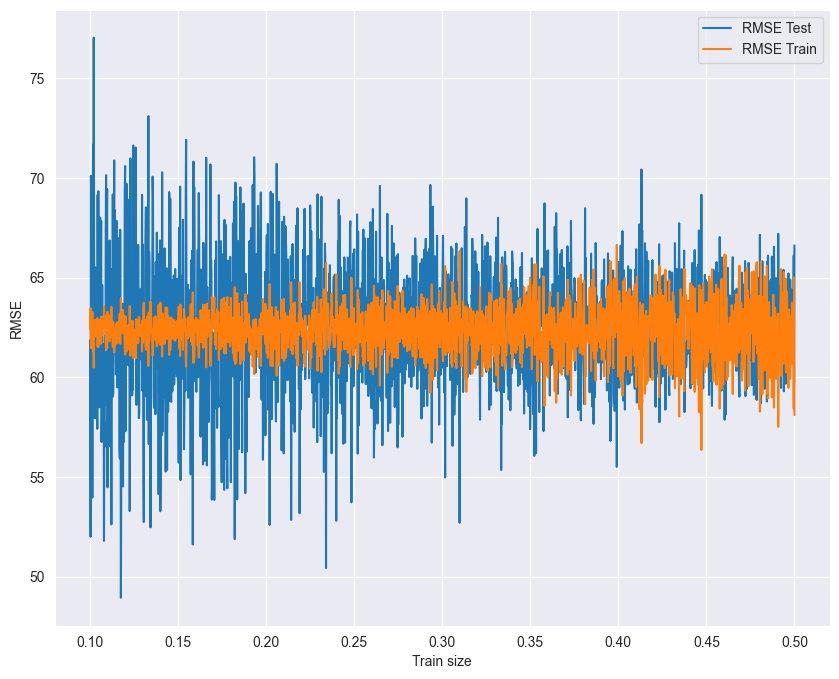

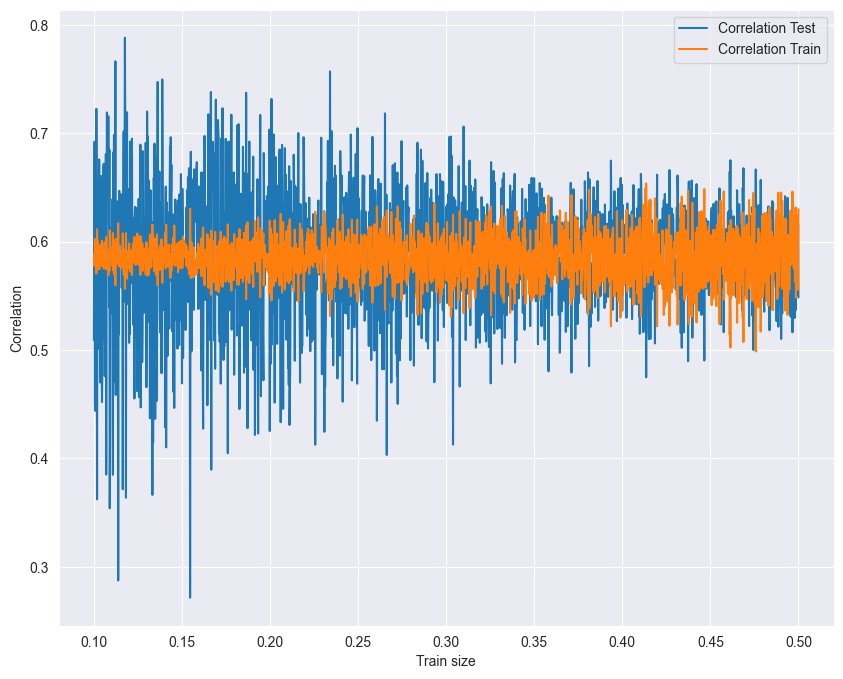

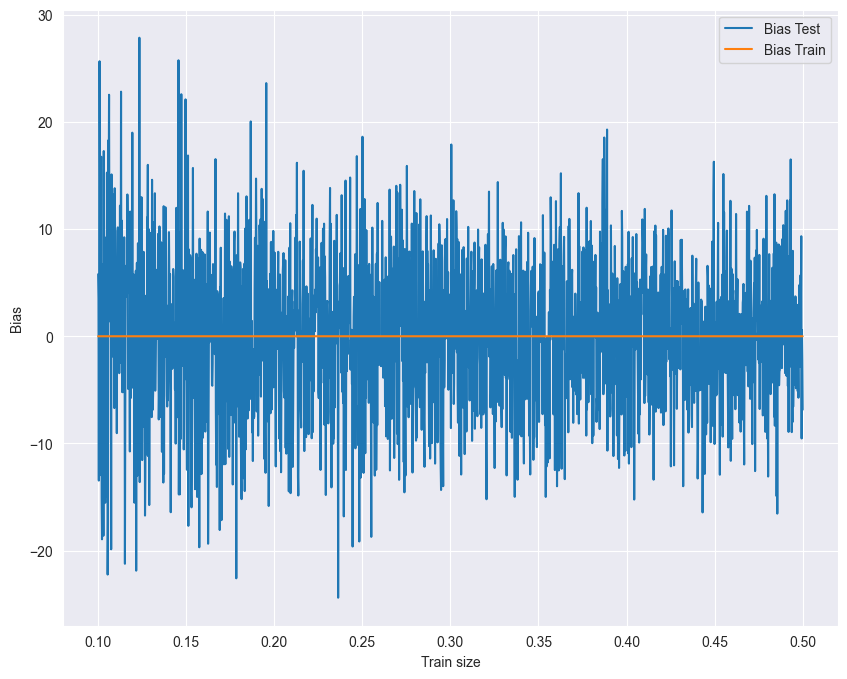

In [112]:
dataset = load_diabetes()
data = dataset.data
target = dataset.target
dataframe = pd.DataFrame(dataset.data, columns=dataset.feature_names)
dataframe["Target"] = target

x = dataframe.drop(columns=["Target"])
y = dataframe["Target"]

assignments = []

for n in np.linspace(0.1,0.5,2000):
    assignment = Assignment()
    assignment.train_size = n
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=n)
    x_train_bmi = sm.add_constant(x_train["bmi"])
    x_test_bmi = sm.add_constant(x_test["bmi"])
    
    model_lin_reg = sm.OLS(y_train, x_train_bmi)
    results_lin_reg = model_lin_reg.fit()
    
    y_hat_lin_reg_train = results_lin_reg.predict(x_train_bmi)
    y_hat_lin_reg_test = results_lin_reg.predict(x_test_bmi)
    
    assignment.rmse_train = sqrt(mean_squared_error(y_train, y_hat_lin_reg_train))
    assignment.rmse_test = sqrt(mean_squared_error(y_test, y_hat_lin_reg_test))
    
    assignment.correlation_train = np.corrcoef(y_hat_lin_reg_train, y_train)[0, 1]
    assignment.correlation_test = np.corrcoef(y_hat_lin_reg_test, y_test)[0, 1]
    
    assignment.bias_train = np.mean(y_hat_lin_reg_train) - np.mean(y_train)
    assignment.bias_test = np.mean(y_hat_lin_reg_test) - np.mean(y_test)
    
    assignments.append(assignment)

train_sizes = [assignment.train_size for assignment in assignments]

rmses_test = [assignment.rmse_test for assignment in assignments]
rmses_train = [assignment.rmse_train for assignment in assignments]
rmse_fig = plt.figure(figsize=(10, 8))
plt.plot(train_sizes, rmses_test, label="RMSE Test")
plt.plot(train_sizes, rmses_train, label="RMSE Train")
plt.xlabel("Train size")
plt.ylabel("RMSE")
plt.legend()
plt.show()

correlations_test = [assignment.correlation_test for assignment in assignments]
correlations_train = [assignment.correlation_train for assignment in assignments]
correlation_fig = plt.figure(figsize=(10, 8))
plt.plot(train_sizes, correlations_test, label="Correlation Test")
plt.plot(train_sizes, correlations_train, label="Correlation Train")
plt.xlabel("Train size")
plt.ylabel("Correlation")
plt.legend()
plt.show()

biases_test = [assignment.bias_test for assignment in assignments]
biases_train = [assignment.bias_train for assignment in assignments]
bias_fig = plt.figure(figsize=(10, 8))
plt.plot(train_sizes, biases_test, label="Bias Test")
plt.plot(train_sizes, biases_train, label="Bias Train")
plt.xlabel("Train size")
plt.ylabel("Bias")
plt.legend()
plt.show()

Between 50% and 90%, there are no visible or noticable differences in the RMSE, correlation, and bias values. 

However, having changed the range from 1% to 99%, the graphs show that the closer we are to 50%, the more consistent the results are.

Therefore, the optimal split seems to be at around 50%.

### Aufgabe 2) Exponentielles Modell

Wir haben in der Vorlesung gesehen, daß es mit Hilfe der gleichen Lösungsmethodik möglich ist auch ein exponentielles Modell zu schätzen

$y=b_0\cdot e^{b_1x}$

indem man logarithmiert:

$\ln{(y)}=\ln{(b_0)}+b_1x$

und die Variablentransformationen

$\tilde{y}=\ln{(y)}$ sowie $\tilde{b_0}=\ln{(b_0)}$ einführt.  

- Transformieren Sie die Zielgröße und schätzen Sie die Parameter des exponentiellen Modelles.
- Stellen Sie die Prognosen graphisch dar
- Analysieren Sie die Residuen graphisch (Histogramm, Scatter Plot output vs. target...)
- Werten Sie das exponentielle Modell auf der Trainings- und Testmenge aus indem Sie quantitative Performance-Metriken bestimmen.
- Wie schneidet das Modell im Vergleich zur linearen Einfachregression ab?
- Wiederholen Sie die Analyse von Aufgabe 1) für das exponentielle Modell
- Vergleichen Sie die Ergebnisse

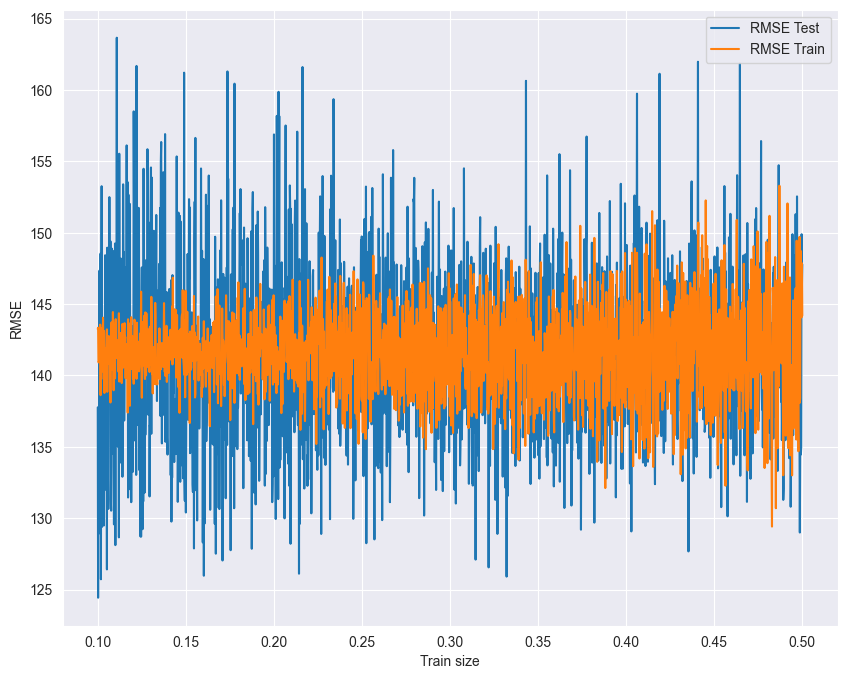

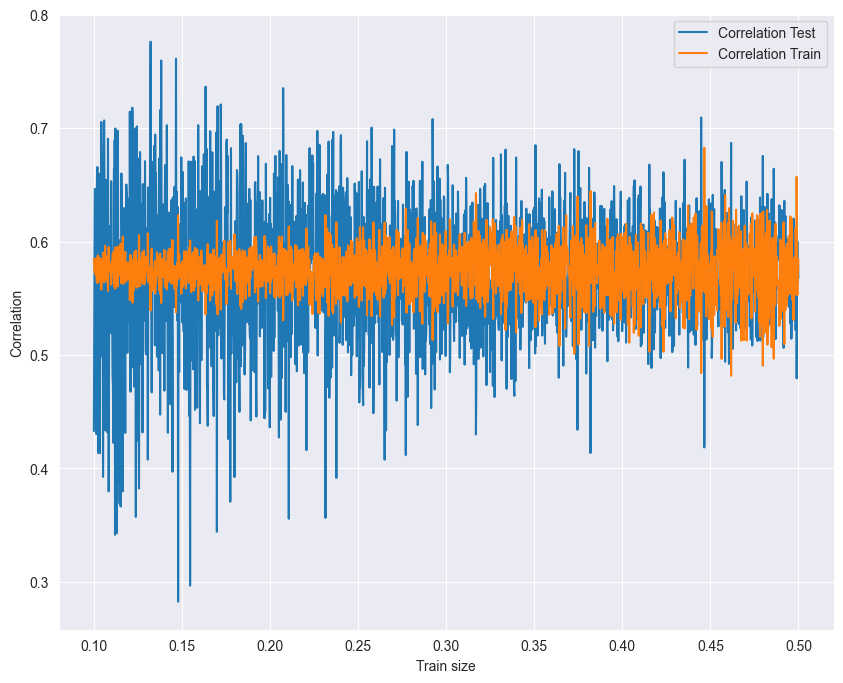

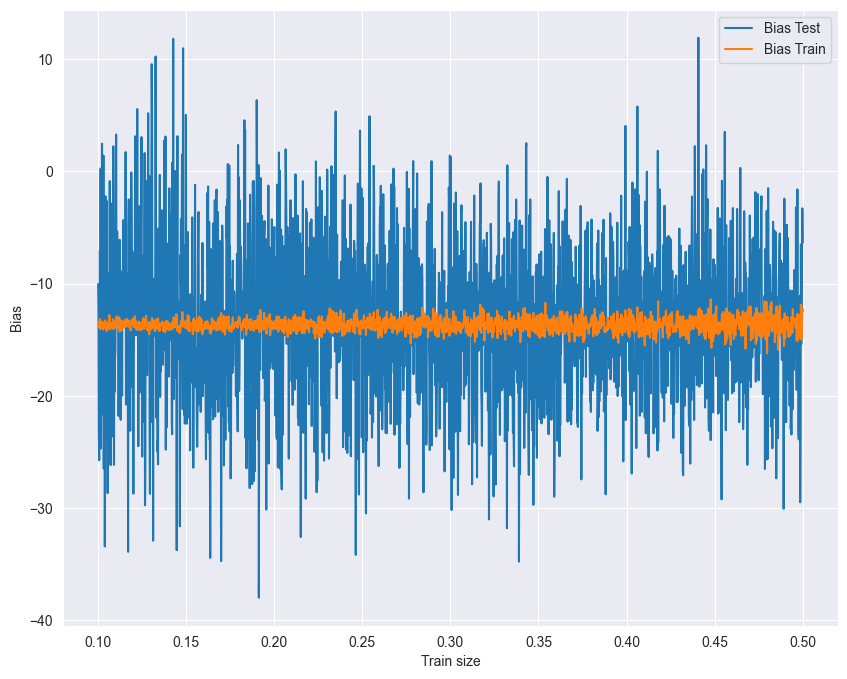

In [115]:
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target

dataframe = pd.DataFrame(data, columns=diabetes.feature_names)
dataframe["Target"] = target

x = dataframe.drop(columns=["Target"])
y = dataframe["Target"]
y_log = np.log(y)

assignments = []

for n in np.linspace(0.1,0.5,2000):
    assignment = Assignment()
    assignment.train_size = n
    
    x_train, x_test, y_train, y_test = train_test_split(x, y_log, test_size=n)
    x_train_bmi = sm.add_constant(x_train["bmi"])
    x_test_bmi = sm.add_constant(x_test["bmi"])
    
    model_lin_reg = sm.OLS(y_train, x_train_bmi)
    results_lin_reg = model_lin_reg.fit()
    
    y_hat_lin_reg_train_log = results_lin_reg.predict(x_train_bmi)
    y_hat_lin_reg_test_log = results_lin_reg.predict(x_test_bmi)
    
    y_hat_lin_reg_train = np.exp(y_hat_lin_reg_train_log)
    y_hat_lin_reg_test = np.exp(y_hat_lin_reg_test_log)
    
    assignment.rmse_train = sqrt(mean_squared_error(y_train, y_hat_lin_reg_train))
    assignment.rmse_test = sqrt(mean_squared_error(y_test, y_hat_lin_reg_test))
    
    assignment.correlation_train = np.corrcoef(y_hat_lin_reg_train, np.exp(y_train))[0, 1]
    assignment.correlation_test = np.corrcoef(y_hat_lin_reg_test, np.exp(y_test))[0, 1]
    
    assignment.bias_train = np.mean(y_hat_lin_reg_train) - np.mean(np.exp(y_train))
    assignment.bias_test = np.mean(y_hat_lin_reg_test) - np.mean(np.exp(y_test))
    
    assignments.append(assignment)
    
train_sizes = [assignment.train_size for assignment in assignments]

rmses_test = [assignment.rmse_test for assignment in assignments]
rmses_train = [assignment.rmse_train for assignment in assignments]
rmse_fig = plt.figure(figsize=(10, 8))
plt.plot(train_sizes, rmses_test, label="RMSE Test")
plt.plot(train_sizes, rmses_train, label="RMSE Train")
plt.xlabel("Train size")
plt.ylabel("RMSE")
plt.legend()
plt.show()

correlations_test = [assignment.correlation_test for assignment in assignments]
correlations_train = [assignment.correlation_train for assignment in assignments]
correlation_fig = plt.figure(figsize=(10, 8))
plt.plot(train_sizes, correlations_test, label="Correlation Test")
plt.plot(train_sizes, correlations_train, label="Correlation Train")
plt.xlabel("Train size")
plt.ylabel("Correlation")
plt.legend()
plt.show()

biases_test = [assignment.bias_test for assignment in assignments]
biases_train = [assignment.bias_train for assignment in assignments]
bias_fig = plt.figure(figsize=(10, 8))
plt.plot(train_sizes, biases_test, label="Bias Test")
plt.plot(train_sizes, biases_train, label="Bias Train")
plt.xlabel("Train size")
plt.ylabel("Bias")
plt.legend()
plt.show()


Same results as the linear model.